# Практическая работа 1. Источники данных. Извлечение данных



ФИО: Сафина Марина Ренатовна

Группа: АДЭУ -201

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

In [3]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize
import requests as reqs

1.1 Файлы данных `CSV` и `Excel`

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [ ]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 1.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 1.2.** Загрузить данные о `Wi-Fi в кинотеатрах` в Colab. - так как работа выполняется в jupyter notebook, то файл с данными был загружен в jupyter
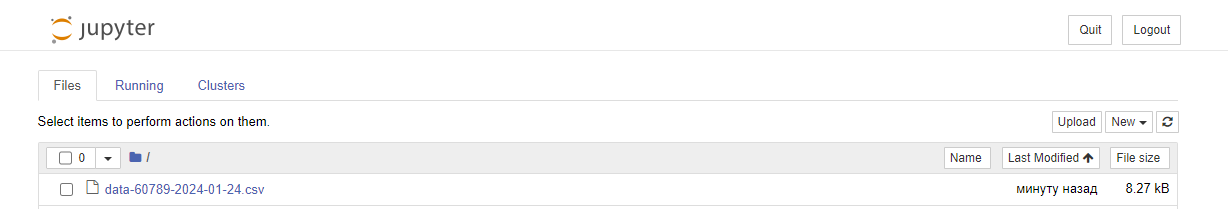

**Задание 1.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [8]:
df_csv = pd.read_csv("data-60789-2024-01-24.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 1.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [9]:
data = df_csv.drop(df_csv.index[0])

In [10]:
data

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN
5,879791967,9,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,район Свиблово,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.851945,37.647549,"{coordinates=[37.647549, 55.851945], type=Point}",NaN,NaN
6,879795206,2,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Бабушкинский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.861974,37.676825,"{coordinates=[37.676825, 55.861974], type=Point}",NaN,NaN
7,879795207,5,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Лефортово,"Российская Федерация, город Москва, внутригоро...",4,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.764303,37.705508,"{coordinates=[37.705508, 55.764303], type=Point}",NaN,NaN
8,879795208,6,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.682787,37.571585,"{coordinates=[37.571585, 55.682787], type=Point}",NaN,NaN
9,879795209,8,Государственное бюджетное учреждение культуры ...,Восточный административный округ,район Новогиреево,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.749841,37.802562,"{coordinates=[37.802562, 55.749841], type=Point}",NaN,NaN
10,879795211,10,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Обручевский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.665309,37.513395,"{coordinates=[37.513395, 55.665309], type=Point}",NaN,NaN


# **Задание 1.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [4]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [12]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=efb65918-60a2-4370-97b3-6f3b4798aa44')

## <font color='blue'>Парсинг веб-страниц с помощью JSON</font>

### <font color="green"> Что такое JSON?</font>

* JSON (нотация объектов JavaScript) — популярный формат данных, используемый для представления структурированных данных.
* Это текстовый формат, который не зависит от языка и может использоваться в Python, Perl и других языках.
* Формат JSON используется для передачи данных между серверами и веб-приложениями.
* Он построен на двух структурах:

      - Коллекция пар имя/значение. Это реализуется как объект, запись, словарь, хеш-таблица, список ключей или ассоциативный массив.
      - Упорядоченный список значений. Это реализуется как массив, вектор, список или последовательность.
     
     
Основные функции `JSON`:

* `dump()`: запись закодированной строки в файл.
* `load()`: декодирование во время чтения файла JSON.
* `dumps()`: кодирование в объекты JSON.
* `loads()`: декодирует строку JSON.

### <font color="green"> Сериализация и десериализация</font>

> … процесс перевода структур данных или состояния объекта в формат, который можно сохранить… или передать… и позже восстановить (возможно, в другой компьютерной среде). (Википедия)

* **Сериализация** — это процесс преобразования объектов или структур данных в потоки байтов или строки.
* Эти потоки байтов затем можно легко сохранить или передать.
* Это позволяет разработчикам сохранять, например, данные конфигурации или прогресс пользователя, а затем сохранять их (на диске или в базе данных) или отправлять в другое место.
* Обратный процесс сериализации известен как **десериализация**.

### Зачем нужна сериализация?

Нам нужна сериализация по следующим причинам:

- **Связь**: Сериализация включает в себя процедуру сериализации и передачи объекта. Это позволяет нескольким компьютерным системам одновременно проектировать, совместно использовать и выполнять объекты.
- **Кэширование**: время, затрачиваемое на создание объекта, больше времени, необходимого для его десериализации. Сериализация минимизирует затраты времени за счет кэширования гигантских объектов.
- **Глубокое копирование**: процесс клонирования упрощается благодаря сериализации. Точная копия объекта получается путем сериализации объекта в массив байтов и последующей его десериализации.
- **Переносимость**. Основное преимущество сериализации заключается в том, что она работает в разных архитектурах и операционных системах.
- **Постоянство**: состояние любого объекта можно сохранить напрямую, применив к нему сериализацию, и сохранить в базе данных, чтобы его можно было получить позже.

**Сериализация**

Мы используем функцию dump(), которая принимает два аргумента:
* Объект данных, подлежащий сериализации.
* Объект файла, в который он будет записан (байтовый формат).

In [13]:
json_page = resp.json()
file_name = "cinema.json"
with open(file_name, "w") as fid:
     json.dump(json_page, fid)

In [22]:
!type cinema.json

{"features": [{"geometry": {"coordinates": [37.636778, 55.818675], "type": "Point"}, "properties": {"datasetId": 60789, "attributes": {"is_deleted": 0, "ID": 1, "CinemaName": "\u0413\u043e\u0441\u0443\u0434\u0430\u0440\u0441\u0442\u0432\u0435\u043d\u043d\u043e\u0435 \u0431\u044e\u0434\u0436\u0435\u0442\u043d\u043e\u0435 \u0443\u0447\u0440\u0435\u0436\u0434\u0435\u043d\u0438\u0435 \u043a\u0443\u043b\u044c\u0442\u0443\u0440\u044b \u0433\u043e\u0440\u043e\u0434\u0430 \u041c\u043e\u0441\u043a\u0432\u044b \u00ab\u041c\u043e\u0441\u043a\u043e\u0432\u0441\u043a\u043e\u0435 \u043a\u0438\u043d\u043e\u00bb \u041a\u0438\u043d\u043e\u0442\u0435\u0430\u0442\u0440 \u00ab\u041c\u043e\u0441\u043a\u0438\u043d\u043e \u041a\u043e\u0441\u043c\u043e\u0441\u00bb", "AdmArea": "\u0421\u0435\u0432\u0435\u0440\u043e-\u0412\u043e\u0441\u0442\u043e\u0447\u043d\u044b\u0439 \u0430\u0434\u043c\u0438\u043d\u0438\u0441\u0442\u0440\u0430\u0442\u0438\u0432\u043d\u044b\u0439 \u043e\u043a\u0440\u0443\u0433", "District": "

**Десериализация JSON**

* Десериализация противоположна сериализации, т. е. преобразованию объекта JSON в соответствующие объекты Python.
* Мы используем функцию load(), которая обычно используется для загрузки из строки, в противном случае корневой объект находится в списке или диктовке.

In [23]:
with open(file_name, "r") as fid:
     json_obj = json.load(fid)

print(json_obj)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [24]:
for key in json_obj:
    print("{:>12}: {}".format(key, json_obj[key]))

    features: [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государствен

In [8]:
api_url = 'https://www.moex.com/ru/marketdata/?g=9#/mode=groups&group=9&collection=177&boardgroup=13&data_type=current&category=main'

Обрабатываем данные с помощью `JSON`:

In [9]:
response = reqs.get(api_url)

In [10]:
print(response.status_code)

403


In [7]:
if response.status_code == 200:
   json_page = json.loads(response.text)

403 Forbidden — это код состояния HTTP, который указывает на то, что сервер понял запрос, но отказывается его выполнить из-за ограничений. Поэтому берем другой Api 

In [48]:
api_url = 'https://deckofcardsapi.com'

In [49]:
response = reqs.get(api_url)

In [50]:
print(response.status_code)

200


In [40]:
if response.status_code == 200:
   json_page = json.loads(response.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In most cases your json.loads- JSONDecodeError: Expecting value: line 1 column 1 (char 0) error is due to : non-JSON conforming quoting. XML/HTML output (that is, a string starting with <), or. incompatible character encoding. - скорее всего выход имеет формат не json

In [74]:
api_url = 'https://pokeapi.co/api/v2/pokemon/ditto'

In [75]:
response = reqs.get(api_url)

In [76]:
print(response.status_code)

200


In [77]:
if response.status_code == 200:
   json_page = json.loads(response.text)

**Задание 1.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [78]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://pokeapi.co/api/v2/pokemon/ditto


**Задание 1.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [79]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json; charset=utf-8


**Задание 1.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [80]:
if response.status_code == 200:
   json_page = json.loads(response.text)

**Задание 1.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [81]:
for x in json_page:
    print(x)

abilities
base_experience
cries
forms
game_indices
height
held_items
id
is_default
location_area_encounters
moves
name
order
past_abilities
past_types
species
sprites
stats
types
weight


Распечатать ключи и значения:

In [82]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

abilities --> [{'ability': {'name': 'limber', 'url': 'https://pokeapi.co/api/v2/ability/7/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'imposter', 'url': 'https://pokeapi.co/api/v2/ability/150/'}, 'is_hidden': True, 'slot': 3}] 

base_experience --> 101 

cries --> {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/132.ogg', 'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/132.ogg'} 

forms --> [{'name': 'ditto', 'url': 'https://pokeapi.co/api/v2/pokemon-form/132/'}] 

game_indices --> [{'game_index': 76, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 76, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 76, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 132, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 132, 'version': {'name':

In [83]:
pprint.pprint(json_page)

{'abilities': [{'ability': {'name': 'limber',
                            'url': 'https://pokeapi.co/api/v2/ability/7/'},
                'is_hidden': False,
                'slot': 1},
               {'ability': {'name': 'imposter',
                            'url': 'https://pokeapi.co/api/v2/ability/150/'},
                'is_hidden': True,
                'slot': 3}],
 'base_experience': 101,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/132.ogg',
           'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/132.ogg'},
 'forms': [{'name': 'ditto',
            'url': 'https://pokeapi.co/api/v2/pokemon-form/132/'}],
 'game_indices': [{'game_index': 76,
                   'version': {'name': 'red',
                               'url': 'https://pokeapi.co/api/v2/version/1/'}},
                  {'game_index': 76,
                   'version': {'name': 'blue',
                               'url': 'htt

# **Задание 1.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

 <font color='blue'>Парсинг веб-страниц с помощью Beautiful Soup</font>

- Веб-скрапинг позволяет загрузить HTML-код веб-сайта и извлечь необходимые вам данные.
- Beautiful Soup — это библиотека Python для очистки данных с веб-сайтов.
- Beautiful Soup создает дерево разбора из проанализированных документов HTML и XML.

In [84]:
from bs4 import BeautifulSoup as bso

## выполнялось самостоятельное задание "Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных: Сайт Мосбиржи — основной сайт инвестора. Очень много полезной информации о ценных бумагах, валютах — https://www.moex.com/"

Мосбиржа не подошла, поскольку при определении типа контента выдавалась ошибка, поэтому был взят Портал открытых данных

In [195]:
# Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get("https://data.mos.ru/opendata/861?version=3&release=38")#Портал открытых данных о wifi в парках

In [196]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 text/html


In [93]:
print(source)

<Response [200]>


In [142]:
print(source.text)#как видим тут получилась кривая кодировка, это мы исправим чуть дальше

<!DOCTYPE html><html lang="en"><head>
  <meta charset="UTF-8">
  <link rel="shortcut icon" type="image/x-icon" href="assets/svg/logo.svg">
  <meta name="google-site-verification" content="nyN3q18qWqaEqyyM32j8Pg-IJiGcYg9B9RWEd1OZ0mw">
  <meta name="yandex-verification" content="a63f7d345486875f">
  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
  <meta name="wmail-verification" content="6edef17ca091babbc2d8b555533b8ada">
  <title>ÐÐ¾ÑÑÐ°Ð» Ð¾ÑÐºÑÑÑÑÑ Ð´Ð°Ð½Ð½ÑÑ Ð¿ÑÐ°Ð²Ð¸ÑÐµÐ»ÑÑÑÐ²Ð° ÐÐ¾ÑÐºÐ²Ñ</title>
  <base href="/">
<style>.mat-typography{font:400 14px/20px Roboto,Helvetica Neue,sans-serif;letter-spacing:normal}@charset "UTF-8";:root{--white-100-color:#000000;--white-72-color:#474747;--white-56-color:#707070;--white-24-color:#c2c2c2;--white-12-color:#e0e0e0;--white-0-color:#ffffff;--black-100-color:#ffffff;--black-72-color:#e0e0e0;--black-56-color:#c2c2c2;--black-24-color:#707070;--black-12-color:#474747;-

**Задание 1.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [187]:
mysoup = bso(source.content, 'html.parser',from_encoding='UTF-8')#без указания кодировки названия выводились некорректно

In [188]:
tag=mysoup.meta['charset']
 
print("Encoding method :",tag) #узнаем кодировку

Encoding method : UTF-8


**Задание 1.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [189]:
print(mysoup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="assets/svg/logo.svg" rel="shortcut icon" type="image/x-icon"/>
  <meta content="nyN3q18qWqaEqyyM32j8Pg-IJiGcYg9B9RWEd1OZ0mw" name="google-site-verification"/>
  <meta content="a63f7d345486875f" name="yandex-verification"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="6edef17ca091babbc2d8b555533b8ada" name="wmail-verification"/>
  <title>
   Портал открытых данных правительства Москвы
  </title>
  <base href="/"/>
  <style>
   .mat-typography{font:400 14px/20px Roboto,Helvetica Neue,sans-serif;letter-spacing:normal}@charset "UTF-8";:root{--white-100-color:#000000;--white-72-color:#474747;--white-56-color:#707070;--white-24-color:#c2c2c2;--white-12-color:#e0e0e0;--white-0-color:#ffffff;--black-100-color:#ffffff;--black-72-color:#e0e0e0;--black-56-color:#c2c2c2;--black-24-color:#707070;--black-12-color:#474747;--black-0-color:#

**Задание 1.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [190]:
print(mysoup.title)

<title>Портал открытых данных правительства Москвы</title>


# Получение данных из таблиц РСУБД

**Задание 1.11.** Считать результаты запроса sqlite в DataFrame pandas

In [191]:
# Считываем результаты запроса sqlite в DataFrame pandas
with sqlite3.connect("movies.sqlite") as conn:
    df = pd.read_sql("SELECT * from movies", conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


# Получение данных `Parquet`

Посетите URL https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

**Задание 1.12.** Считайте данные из файла Parquet. Использовать метод pandas read_parquet.

In [192]:
df_parquet = pd.read_parquet("yellow_tripdata_2023-03.parquet")
df_parquet.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


# Индивидуальное задание

- Загрузить задание в среду colab.research

- Выполнить задания `1-11`, результаты сохранить в файле `ПР_1_ФИО.ipynb`.

- Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных:

1. Сайт Мосбиржи — основной сайт инвестора. Очень много полезной информации о ценных бумагах, валютах — https://www.moex.com/

2. Список биржевых инвестиционных фондов (ETF) на Московской бирже — https://www.moex.com/msn/etf

3. Сайт Санкт-Петербургской биржи — https://spbexchange.ru/

4. Список акций иностранных компаний, которые можно купить на Санкт-Петербургской бирже — http://stocks.spbexchange.ru/

5. ETF от FinEx — https://finex-etf.ru/products/

6. Котировки всех в мире акций, дивидендный календарь по акциям, курсы всех валют — https://ru.investing.com/

7. Котировки и курсы акций в режиме реального времени с фильтром по тем странам, которые вас интересуют, — https://ru.investing.com/equities/

8. Информация о дивидендах по российским акциям — https://www.dohod.ru/ik/analytics/dividend/

9. Дивиденды российских и американских компаний — https://investmint.ru/

10. Сервис с информацией по российским облигациям — https://bonds.finam.ru/

11. Анализ российских облигаций — https://www.dohod.ru/analytic/bonds

12. Котировки корпоративных облигаций — https://smart-lab.ru/q/bonds/

13. Иностранные акции, инвестиционные идеи — https://finviz.com/

14. Сервис для ведения портфеля ценных бумаг. Можно сделать публичный доступ и показать портфель своим друзьям, например — https://intelinvest.ru/

15. Журнал «Тинькофф». Информация о финансах, инвестициях, бесплатное обучение — https://journal.tinkoff.ru/pro/invest/

16. Обучающие курсы от Мосбиржи. Там же полезные сервисы в помощь инвесторам — https://red-circule.com/

17. Новости компаний и новая информация по акциям — https://smart-lab.ru/news/

18. Ожидаемые события фондового рынка — https://bcs-express.ru/ozhidaemye-sobytiya
Подробнее на сайте Banki.ru https://www.banki.ru/news/lenta/?id=10936184

19. Реестр сведений о банкротстве — https://bankrot.fedresurs.ru/

20. Реестр доверенностей — https://www.reestr-dover.ru/

21. Реестр уведомлений о залоге движимого имущества — https://www.reestr-zalogov.ru/state/index

22. Узнать свою кредитную историю — https://www.nbki.ru/serviceszaem/svedeniya/

23. Узнать задолженность на сайте ФССП. Не только свою — http://fssp.gov.ru/iss/ip/

24. О пособиях для безработных в 2020 году — https://www.gosuslugi.ru/help/news/2020_05_08_work_pay

25. Проект Банка России по финансовой грамотности — https://fincult.info/
Подробнее на сайте Banki.ru https://www.banki.ru/news/lenta/?id=1093618

- Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы. Выявить показатели в наборе данных(изучить три датасета):

1. Торговля.

2. Дороги и транспорт.

3. ЖКХ.

4. Образование.

5. Трудоустройство

6. Здравоохранение.

7. Социальная среда.

8. Справочная информация.

9. Земля и имущество.

10. Культура.

11. Досух и отдых.

12. Предпринимательство.

13. Торговля-2.

14. Дороги и транспорт-2.

15. ЖКХ-2.

16. Образование-2.

17. Трудоустройство-2.

18. Здравоохранение-2.

19. Социальная среда-2.

20. Справочная информация-2.

21. Земля и имущество-2.

22. Культура-2.

23. Досух и отдых-2.

24. Предпринимательство-2.

25. Торговля-3.



# Индивидуальное задание

Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы. Выявить показатели в наборе данных(изучить три датасета):
Торговля.

In [200]:
resp1 = reqs.request(method='GET', url='https://apidata.mos.ru/v1/features/620?api_key=695064d7-e80b-43a1-a818-6072826382e4')

In [236]:
json_page1 = resp1.json()
file_name1 = "yarmarka.json"
with open(file_name1, "w") as fid:
     json.dump(json_page1, fid)

In [237]:
with open(file_name1, "r") as fid:
     json_obj = json.load(fid)

print(json_obj)

{'features': [{'geometry': {'coordinates': [37.67723772, 55.67587645], 'type': 'Point'}, 'properties': {'datasetId': 620, 'attributes': {'is_deleted': 0, 'ID': 75382, 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Нагатинский Затон, улица Новинки, дом 31', 'AdmArea': 'Южный административный округ', 'District': 'район Нагатинский Затон', 'StatusFairs': 'открыто', 'PeriodOfPlacement': '02.02.2024-21.04.2024', 'WorkingHours': [{'is_deleted': 0, 'DayOfWeek': 'пятница', 'Hours': '08:00-21:00', 'global_id': 550}, {'is_deleted': 0, 'DayOfWeek': 'суббота', 'Hours': '08:00-21:00', 'global_id': 551}, {'is_deleted': 0, 'DayOfWeek': 'воскресенье', 'Hours': '08:00-21:00', 'global_id': 552}], 'GoodsCategory': 'сельскохозяйственная продукция', 'SituationalPlan': '2e45e43d-e309-45b8-b469-7bd775c92de0', 'AmountOfPlaces': 38, 'Longitude_WGS84': '37.6772377200000000', 'Latitude_WGS84': '55.6758764500000000', 'UNOM': '16413', 'EntryState': 'активна', 'global

In [238]:
resp2 = reqs.request(method='GET', url='https://apidata.mos.ru/v1/features/654?api_key=695064d7-e80b-43a1-a818-6072826382e4')

In [239]:
json_page2 = resp2.json()
file_name2 = "rynok.json"
with open(file_name2, "w") as fid:
     json.dump(json_page2, fid)

In [240]:
with open(file_name2, "r") as fid:
     json_obj = json.load(fid)

print(json_obj)

{'features': [{'geometry': {'coordinates': [37.555417, 55.599169], 'type': 'Point'}, 'properties': {'datasetId': 654, 'attributes': {'is_deleted': 0, 'ID': 4, 'Name': '«Бор-1»', 'global_id': 634960233, 'AdmArea': 'Юго-Западный административный округ', 'District': 'район Ясенево', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Ясенево, Новоясеневский проспект, дом 25/20', 'ManagementCompany': 'Бор-1', 'INN': '7736158254', 'KPP': '772801001', 'OGRN': '1037739127326', 'LegalAddressOfManagementCompany': '117463, Москва г, НОВОЯСЕНЕВСКИЙ ПР-КТ, дом Д. 46, строение СТР. 1', 'MarketType': 'Специализированный (сельскохозяйственный)', 'ExtraInfo': ''}, 'rowId': None, 'versionNumber': 2, 'releaseNumber': 41}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.554883, 55.897109], 'type': 'Point'}, 'properties': {'datasetId': 654, 'attributes': {'is_deleted': 0, 'ID': 71, 'Name': '«Автохозяйство Лианозово»', 'global_id': 634960515, 'AdmArea': 'Севе

In [241]:
resp3 = reqs.request(method='GET', url='https://apidata.mos.ru/v1/features/1904?api_key=695064d7-e80b-43a1-a818-6072826382e4')

In [242]:
json_page3 = resp3.json()
file_name3 = "bytovye_uslugi.json"
with open(file_name3, "w") as fid:
     json.dump(json_page3, fid)

In [243]:
with open(file_name3, "r") as fid:
     json_obj = json.load(fid)

print(json_obj)

{'features': [{'geometry': {'coordinates': [37.714430409, 55.878900104], 'type': 'Point'}, 'properties': {'datasetId': 1904, 'attributes': {'is_deleted': 0, 'Latitude_WGS84': '55.8789001039403600', 'ID': '000005011', 'Name': 'Парикмахерская', 'global_id': 637350471, 'IsNetObject': 'нет', 'OperatingCompany': '', 'TypeService': 'бытовые услуги', 'TypeObject': 'парикмахерские и косметические услуги', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Ярославский район', 'Address': 'город Москва, улица Егора Абакумова, дом 9', 'PublicPhone': [{'is_deleted': 0, 'PublicPhone': '(903) 738-11-55', 'global_id': 228202}], 'WorkingHours': [{'is_deleted': 0, 'DayOfWeek': 'понедельник', 'Hours': '09:00-20:00', 'global_id': 1665985}, {'is_deleted': 0, 'DayOfWeek': 'вторник', 'Hours': '09:00-20:00', 'global_id': 1665986}, {'is_deleted': 0, 'DayOfWeek': 'среда', 'Hours': '09:00-20:00', 'global_id': 1665987}, {'is_deleted': 0, 'DayOfWeek': 'четверг', 'Hours': '09:00-20:00', 'global_id':